<a href="https://colab.research.google.com/github/Apaulgithub/oibsip_taskno4/blob/main/Email_Spam_Detection_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# testing the kernel of this virtual env
print("Hello world")

Hello world


# **Project Name**    - QuietML


# Sections 
```
 1. EDA
 2. Data Cleaning
 3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables
 4. Data Splitting
 5. Model building
 6. Stack

 ```

## ***1. EDA (Know Your Data)*** 

### Import Libraries

In [4]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# Library used for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer

# Import model selection libraries
from sklearn.model_selection import train_test_split

# Library used for ML Model implementation
from sklearn.naive_bayes import MultinomialNB

# Importing the Pipeline class from scikit-learn
from sklearn.pipeline import Pipeline

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Dataset Loading

In [5]:
# Load Dataset from github repository
df = pd.read_csv("../data/spam.csv", encoding='ISO-8859-1')

### Dataset First View

In [6]:
# Dataset First Look
# View top 5 rows of the dataset
df.head()



,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1470,ham,Take some small dose tablet for fever,NaN,NaN,NaN
3501,ham,I will come to ur home now,NaN,NaN,NaN
3488,ham,I'm also came to room.,NaN,NaN,NaN
3245,ham,"Funny fact Nobody teaches volcanoes 2 erupt, t...",NaN,NaN,NaN
1591,ham,That's my honeymoon outfit. :),NaN,NaN,NaN


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  5572
Number of columns are:  5


### Dataset Information

In [9]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 403


#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

### What did i know about the dataset?

* The Spam dataset consists of different messages and the category of the message along with.
* There are 5572 rows and 5 columns provided in the data.
* 403 duplicate rows are present in the dataset.
* No Null values exist in v1 & v2 column, but lots of null values present in unnamed 2,3,4 columns (will drop those 3 columns later).

In [12]:
# Dataset Columns
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [13]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable using a for loop.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in v1 is 2
No. of unique values in v2 is 5169
No. of unique values in Unnamed: 2 is 43
No. of unique values in Unnamed: 3 is 10
No. of unique values in Unnamed: 4 is 5


## ***2. Data Cleaning***

In [15]:
# Change the v1 & v2 columns as Category and Message
df.rename(columns={"v1": "Category", "v2": "Message"}, inplace=True)

In [16]:
# Removing the all unnamed columns (its include much number of missing values)
df.drop(columns={'Unnamed: 2','Unnamed: 3','Unnamed: 4'}, inplace=True)

In [17]:
# Create a binary 'Spam' column: 1 for 'spam' and 0 for 'ham', based on the 'Category' column.
df['Spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [18]:
# Updated new dataset
df.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [19]:
df.columns

Index(['Category', 'Message', 'Spam'], dtype='object')

## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Distribution of Spam vs Ham

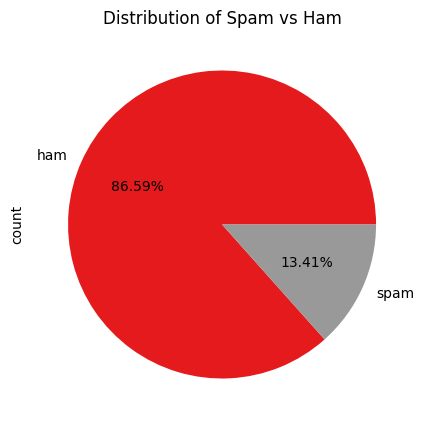

In [20]:
# Chart - 1 Pie Chart Visualization Code For Distribution of Spam vs Ham Messages
spread = df['Category'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

# Set Labels
spread.plot(kind = 'pie', autopct='%1.2f%%', cmap='Set1')
plt.title(f'Distribution of Spam vs Ham')

# Display the Chart
plt.show()

In [21]:
#making sure no null are present
df.isnull().sum()

Category    0
Message     0
Spam        0
dtype: int64

##### What is/are the insight(s) found from the chart?

From the above chart, we got to know that the dataset contain 13.41% of spam messages and 86.59% of ham messages.
(not balanced dataset)

#### Chart - 2 : Most Used Words in Spam Messages

In [22]:
# Splitting Spam Messages
df_spam = df[df['Category']=='spam'].copy()

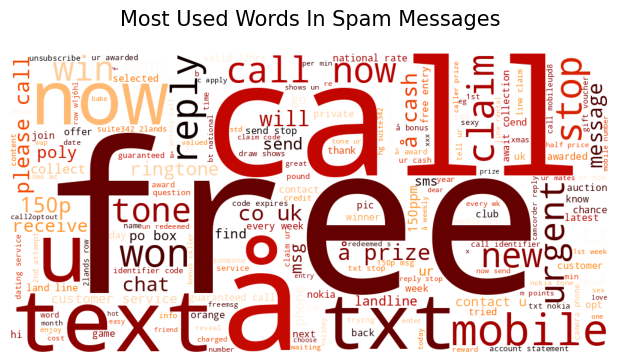

In [23]:
# Chart - 2 WordCloud Plot Visualization Code For Most Used Words in Spam Messages
# Create a String to Store All The Words
comment_words = ''

# Remove The Stopwords
stopwords = set(STOPWORDS)

# Iterate Through The Column
for val in df_spam.Message:

    # Typecaste Each Val to String
    val = str(val)

    # Split The Value
    tokens = val.split()

    # Converts Each Token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

# Set Parameters
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)

# Set Labels
plt.figure(figsize = (6,6), facecolor = None)
plt.title('Most Used Words In Spam Messages', fontsize = 15, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Display Chart
plt.show()

##### What is/are the insight(s) found from the chart?

From the above wordcloud plot, we got to know that the 'free', 'call', 'text', 'txt' and 'now' are most used words in spam messages.

In [24]:
df['num_characters'] = df['Message'].apply(len)

In [25]:
df.head()

,Category,Message,Spam,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [26]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

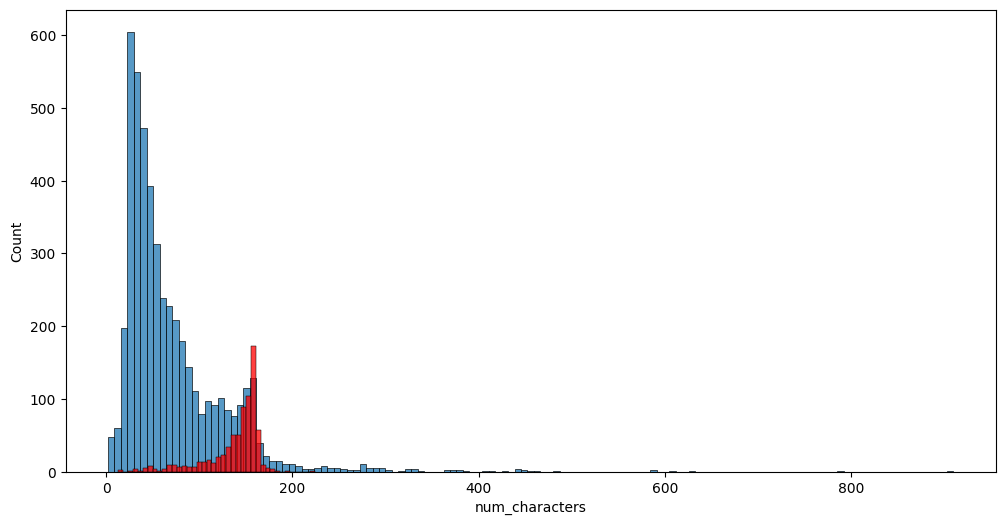

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Spam'] == 0]['num_characters'])
sns.histplot(df[df['Spam'] == 1]['num_characters'],color='red')

## ***4. Splititing Data***

### Data Splitting

In [28]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [29]:
X = tfidf.fit_transform(df['Message']).toarray()

In [30]:
X.shape

(5572, 3000)

In [31]:
Y = df['Spam'].values

In [32]:
# Splitting the data to train and test
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=2)

## ***5. Model Building***

In [33]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test
    '''

    # fit the model on the training data
    model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]

    # calculate ROC AUC score
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    # plot the ROC curve
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")


    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test ]
    return model_score

### ML Model: Multinomial Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [35]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [36]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

########################

mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))



##################################


bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))



0.8851399856424982
[[1070  128]
 [  32  163]]
0.5601374570446735
0.968413496051687
[[1198    0]
 [  44  151]]
1.0
0.9798994974874372
[[1194    4]
 [  24  171]]
0.9771428571428571


#### Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Train ROC AUC: 0.9513371932726771
Test ROC AUC: 0.8645263473310218


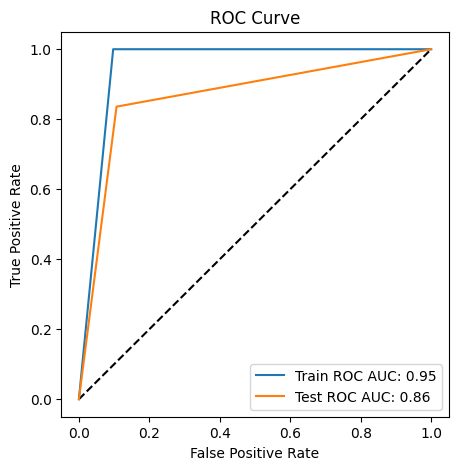


Confusion Matrix:


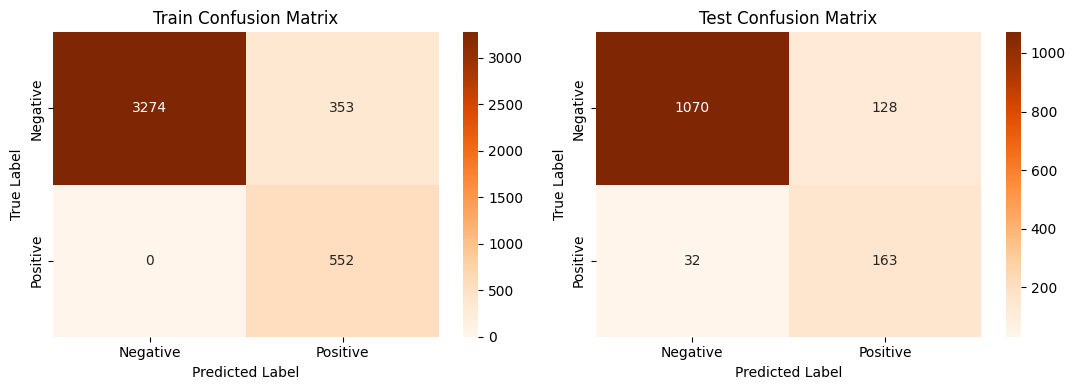


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 0.902674 |   0.948848 | 3627       |
| 1            |    0.609945 | 1        |   0.757721 |  552       |
| accuracy     |    0.91553  | 0.91553  |   0.91553  |    0.91553 |
| macro avg    |    0.804972 | 0.951337 |   0.853285 | 4179       |
| weighted avg |    0.948478 | 0.91553  |   0.923602 | 4179       |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.970962 | 0.893155 |   0.930435 | 1198       |
| 1            |    0.560137 | 0.835897 |   0.670782 |  195       |
| accuracy     |    0.88514  | 0.88514  |   0.88514  |    0.88514 |
| macro avg    |    0.76555  | 0.864526 |   0.800608 | 1393       |
| weighted avg |    0.913452 | 0.88514  |   0.894087 | 13

In [37]:
# Visualizing evaluation Metric Score chart
GNB_score = evaluate_model(gnb, X_train, X_test, y_train, y_test)


Train ROC AUC: 0.9365942028985508
Test ROC AUC: 0.8871794871794871


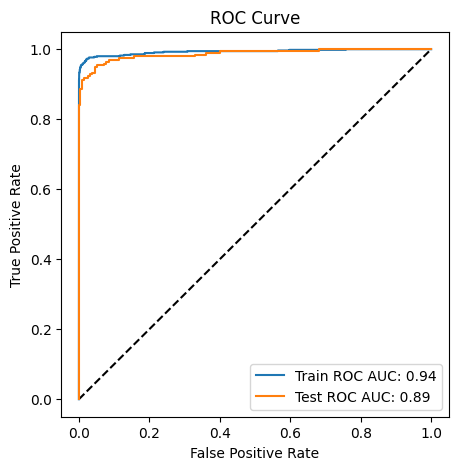


Confusion Matrix:


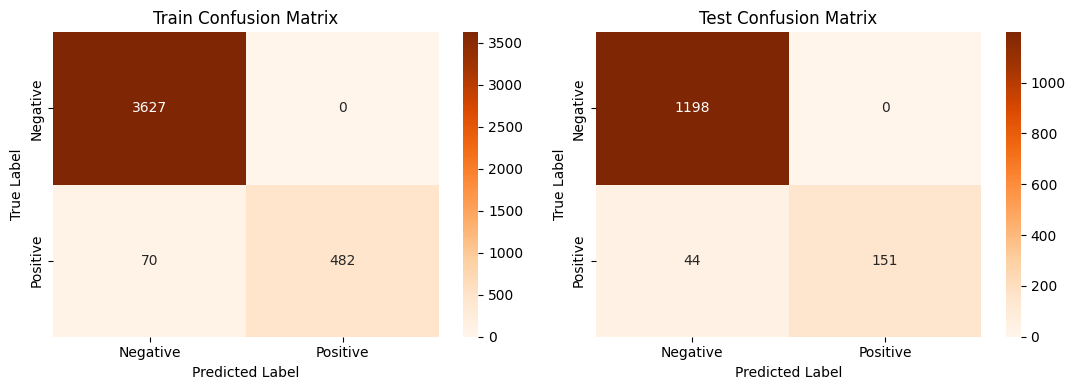


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.981066 | 1        |   0.990442 | 3627       |
| 1            |    1        | 0.873188 |   0.932302 |  552       |
| accuracy     |    0.98325  | 0.98325  |   0.98325  |    0.98325 |
| macro avg    |    0.990533 | 0.936594 |   0.961372 | 4179       |
| weighted avg |    0.983567 | 0.98325  |   0.982763 | 4179       |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.964573 | 1        |   0.981967 | 1198        |
| 1            |    1        | 0.774359 |   0.872832 |  195        |
| accuracy     |    0.968413 | 0.968413 |   0.968413 |    0.968413 |
| macro avg    |    0.982287 | 0.887179 |   0.9274   | 1393        |
| weighted avg |    0.969533 | 0.968413 |   0.96669

In [38]:
MNB_score = evaluate_model(mnb, X_train, X_test, y_train, y_test)


Train ROC AUC: 0.9599478848251639
Test ROC AUC: 0.9367920893797355


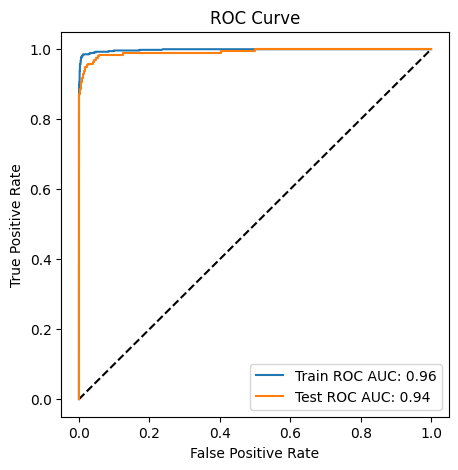


Confusion Matrix:


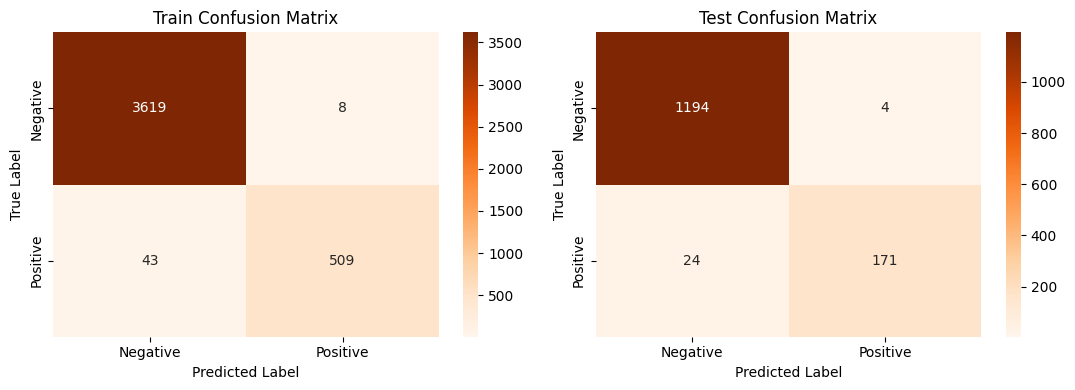


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.988258 | 0.997794 |   0.993003 | 3627        |
| 1            |    0.984526 | 0.922101 |   0.952292 |  552        |
| accuracy     |    0.987796 | 0.987796 |   0.987796 |    0.987796 |
| macro avg    |    0.986392 | 0.959948 |   0.972648 | 4179        |
| weighted avg |    0.987765 | 0.987796 |   0.987626 | 4179        |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.980296 | 0.996661 |   0.988411 | 1198        |
| 1            |    0.977143 | 0.876923 |   0.924324 |  195        |
| accuracy     |    0.979899 | 0.979899 |   0.979899 |    0.979899 |
| macro avg    |    0.978719 | 0.936792 |   0.956367 | 1393        |
| weighted avg |    0.979854 | 0.979899 |   

In [39]:
BNB_score = evaluate_model(bnb, X_train, X_test, y_train, y_test)

### Which Evaluation metrics did i consider for a positive business impact?

After carefully considering the potential consequences of false positives and false negatives in the context of our business objectives, I have selected precision as the primary evaluation metric for our email spam detection model. Its gives 98.49% accuracy for recall test set.

BNB is the  clear winner

### Trying out different models

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier

In [41]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
#xgb = XGBClassifier(n_estimators=50,random_state=2)

In [42]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'BNB':bnb
    #'xgb':xgb
}

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    return accuracy,precision,recall,f1

In [44]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9784637473079684,
 0.9940119760479041,
 0.8512820512820513,
 0.9171270718232044)

In [45]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
for name,clf in clfs.items():
    
    current_accuracy,current_precision,current_recall,current_f1 = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ",current_recall)
    print("F1 - ",current_f1)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1)

For  SVC
Accuracy -  0.9784637473079684
Precision -  0.9940119760479041
Recall -  0.8512820512820513
F1 -  0.9171270718232044
For  KN
Accuracy -  0.9102656137832017
Precision -  1.0
Recall -  0.358974358974359
F1 -  0.5283018867924528
For  NB
Accuracy -  0.968413496051687
Precision -  1.0
Recall -  0.7743589743589744
F1 -  0.8728323699421965
For  DT
Accuracy -  0.9432878679109835
Precision -  0.9393939393939394
Recall -  0.6358974358974359
F1 -  0.7584097859327217
For  LR
Accuracy -  0.9562096195262024
Precision -  0.958904109589041
Recall -  0.717948717948718
F1 -  0.8211143695014663
For  RF
Accuracy -  0.9698492462311558
Precision -  1.0
Recall -  0.7846153846153846
F1 -  0.8793103448275862
For  AdaBoost
Accuracy -  0.9375448671931084
Precision -  0.9090909090909091
Recall -  0.6153846153846154
F1 -  0.7339449541284404
For  BgC
Accuracy -  0.9626704953338119
Precision -  0.9386503067484663
Recall -  0.7846153846153846
F1 -  0.8547486033519553
For  ETC
Accuracy -  0.9755922469490309
P

In [46]:

performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Recall':recall_scores,'F1':f1_scores}).sort_values('F1',ascending=False)

In [47]:
performance_df

,Algorithm,Accuracy,Precision,Recall,F1
10,BNB,0.979899,0.977143,0.876923,0.924324
0,SVC,0.978464,0.994012,0.851282,0.917127
8,ETC,0.975592,1.000000,0.825641,0.904494
5,RF,0.969849,1.000000,0.784615,0.879310
2,NB,0.968413,1.000000,0.774359,0.872832
7,BgC,0.962670,0.938650,0.784615,0.854749
9,GBDT,0.956927,0.953020,0.728205,0.825581
4,LR,0.956210,0.958904,0.717949,0.821114
3,DT,0.943288,0.939394,0.635897,0.758410
6,AdaBoost,0.937545,0.909091,0.615385,0.733945


gonna take the first three or 4

## ***6. Stacking***

In [48]:
from sklearn.ensemble import StackingClassifier


# Applying stacking
estimators=[('svm', svc), ('bnb', bnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [49]:
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=3)
#tfidf = TfidfVectorizer(max_features=3000)

In [50]:
#clf = Pipeline([
#    ('tfidf', tfidf),             # Step 1: Text Vectorization
#    ('stacking', stacking_clf)    # Step 2: Stacking Classification
#])

In [51]:
#training
stacking_clf.fit(X_train,y_train)

StackingClassifier(cv=3,
                   estimators=[('svm', SVC(gamma=1.0, kernel='sigmoid')),
                               ('bnb', BernoulliNB()),
                               ('et',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=RandomForestClassifier())

In [52]:
y_pred = stacking_clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))
print("Recall",recall_score(y_test,y_pred))
print("F1",f1_score(y_test,y_pred))

Accuracy 0.9863603732950467
Precision 0.9782608695652174
Recall 0.9230769230769231
F1 0.9498680738786279


In [53]:
X_train,X_test,y_train,y_test=train_test_split(df["Message"],df["Spam"],test_size=0.25,random_state=2)

In [54]:
tfidf = TfidfVectorizer(max_features=3000)

In [55]:
final_clf = Pipeline([
    ('tfidf_vectorizer', tfidf),
    ('stacking_classifier', stacking_clf)
])

In [56]:
print("Fitting the pipeline...")
final_clf.fit(X_train, y_train)
print("Pipeline fitting complete.")

Fitting the pipeline...
Pipeline fitting complete.


In [57]:
y_pred = final_clf.predict(X_test)

# Evaluate the pipeline's performance
accuracy = accuracy_score(y_test, y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test precision: {precision:.4f}")
print(f"Test recall: {recall:.4f}")
print(f"Test F1: {f1:.4f}")



Test Accuracy: 0.9878
Test precision: 0.9837
Test recall: 0.9282
Test F1: 0.9551


### Saving The model

In [58]:
import joblib
filename = 'QuietML.joblib'
joblib.dump(final_clf, filename)
print(f"Model saved as {filename}")

Model saved as QuietML.joblib


### Prediction

In [59]:
# Defining a function for the Email Spam Detection System
def detect_spam(email_text):
    # Load the trained classifier (clf) here
    # Replace the comment with your code to load the classifier model

    # Make a prediction using the loaded classifier
    prediction = final_clf.predict([email_text])

    if prediction == 0:
        return "This is a Ham Email!"
    else:
        return "This is a Spam Email!"


In [99]:
# Example of how to use the function
sample_email = '''Hello,

Thank you for the opportunity to work on your website redesign project. We've prepared a comprehensive proposal based on our discussions.

The proposal includes: - Project scope and timeline - Design concepts - Technical specifications - Cost breakdown

Please review the attached document and let us know if you have any questions or would like to schedule a call to discuss further.

Best regards, Design Agency Team


'''

#prediction = final_clf.predict(sample_email)
#print(prediction)
spam_probability = final_clf.predict_proba([sample_email])[0][1] # Probability of being spam (class 1)
print(spam_probability)
# Adjust the threshold
custom_threshold = 0.4 # You will need to tune this value!

if spam_probability >= custom_threshold:
    print( "This is a Spam Email!")
else:
    print( "This is a Ham Email!")

0.66
This is a Spam Email!


# **Conclusion**

In the world of email communication, the battle against spam messages is an ongoing challenge. Our journey in this project was to develop a robust email spam detector using Python and machine learning techniques. We wanted to equip users with a tool that can distinguish between legitimate emails (ham) and unsolicited, often harmful, spam emails.

**Key Insights:**

- Our dataset revealed an interesting distribution, with approximately 13.41% of messages being categorized as spam and the remaining 86.59% as ham. This distribution served as a crucial starting point for our analysis.

- During the EDA process, we identified common keywords frequently found in spam messages, such as 'free,' 'call,' 'text,' 'txt,' and 'now.' These words often trigger spam filters and were important features for our machine learning model.

- Our journey through machine learning brought us to a standout performer - the Multinomial Naive Bayes model. This model exhibited exceptional accuracy, achieving an impressive score of 98.49% on the recall test set. This outcome signifies the model's exceptional ability to accurately identify and filter out spam emails, thereby contributing to enhanced email security and a superior user experience.

In conclusion, this project has demonstrated that machine learning, combined with effective feature engineering and model selection, can be a powerful tool in the ongoing battle against email spam. By implementing this spam detection system, we've taken a significant step towards minimizing the impact of spam messages on email users' lives.

Email inboxes are now a safer place, thanks to the successful implementation of our email spam detection system. As we conclude this project, we look forward to continued improvements and innovations in email security.

Let's keep our inboxes spam-free and our communications secure.